In [1]:
import pandas as pd

data = pd.read_csv(r'./rotten_tomatoes.csv')

In [5]:
data = data[['text','labels']][:5000]
data.head()

,text,labels
0,A fantasy adventure that fuses Greek mythology...,Fresh
1,"Uma Thurman as Medusa, the gorgon with a coiff...",Fresh
2,With a top-notch cast and dazzling special eff...,Fresh
3,Whether audiences will get behind The Lightnin...,Fresh
4,What's really lacking in The Lightning Thief i...,Rotten


In [6]:
data.dropna(inplace = True)

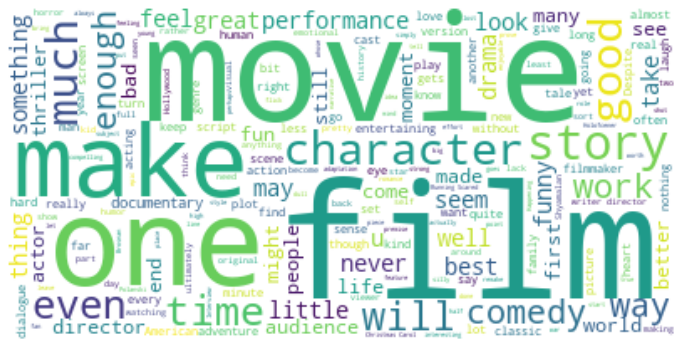

In [7]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text=' '.join(data['text'])
my_stopwords = set(STOPWORDS)
my_cloud = WordCloud(background_color='white', stopwords=my_stopwords).generate(text)
plt.figure(figsize=(12,10))
plt.axis("off")
plt.imshow(my_cloud, interpolation='bilinear')

In [8]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words=set(stopwords.words('english'))
port=WordNetLemmatizer()

In [9]:

def preprocess(text):
    def tokenizing(text2):
        return word_tokenize(text2)
    
    def removeword(text3):
        return [w for w in text3 if not w in stop_words]
    
    def stemming(removeStopWords):
        return [port.lemmatize(word) for word in removeStopWords]
    
    return " ".join(stemming(removeword(tokenizing(re.sub(r'[^\w\s]', '', text.lower())))))

In [10]:
preprocess_text = data.text.apply(preprocess)

In [11]:
preprocess_text.head()

0    fantasy adventure fuse greek mythology contemp...
1    uma thurman medusa gorgon coiffure writhing sn...
2    topnotch cast dazzling special effect tide tee...
3    whether audience get behind lightning thief ha...
4    whats really lacking lightning thief genuine s...
Name: text, dtype: object

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
values = tfidf_vectorizer.fit_transform(preprocess_text)

# Show the Model as a pandas DataFrame
feature_names = tfidf_vectorizer.get_feature_names()
X=pd.DataFrame(values.toarray(), columns = feature_names)
X

C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,007,10,100,1000,10000,10000bc,10000yearold,100minute,100yarddash,101,...,zionism,zippered,zombie,zombiedom,zone,zooey,zoom,zwick,ãpoca,ïall
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
y = label_encoder.fit_transform(data.labels)

In [15]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [17]:
from sklearn import metrics
from sklearn.metrics import classification_report

In [18]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
GB = gnb.predict(X_test)
GB_Accuracy=metrics.accuracy_score(y_test, GB)
print("Accuracy:",GB_Accuracy)


Accuracy: 0.6413333333333333


In [19]:
gbr=classification_report(y_test,GB)
print(gbr)

              precision    recall  f1-score   support

           0       0.68      0.59      0.63       779
           1       0.61      0.70      0.65       721

    accuracy                           0.64      1500
   macro avg       0.64      0.64      0.64      1500
weighted avg       0.65      0.64      0.64      1500



In [20]:
from sklearn.naive_bayes import MultinomialNB

#Create a Gaussian Classifier
mnb = MultinomialNB()

#Train the model using the training sets
mnb.fit(X_train, y_train)

#Predict the response for test dataset
MB = mnb.predict(X_test)
mb_Accuracy=metrics.accuracy_score(y_test, MB)
print("Accuracy:",mb_Accuracy)


Accuracy: 0.728


In [21]:
mbr=classification_report(y_test,MB)
print(mbr)

              precision    recall  f1-score   support

           0       0.70      0.83      0.76       779
           1       0.77      0.62      0.69       721

    accuracy                           0.73      1500
   macro avg       0.74      0.72      0.72      1500
weighted avg       0.73      0.73      0.72      1500

